<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Building_Finance_Bot_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Using ReAct
!pip install langchain langchain_groq langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 5.3 MB/s eta 0:00:00


In [4]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('groq_api_key')
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')

In [7]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


In [8]:
from langgraph.graph import MessagesState, StateGraph, END, START
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from typing import Annotated, TypedDict
import operator
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

In [35]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [37]:
def multiply(a: int, b: int)->int:
  """
  Multiply a and b.
  Args:
      a: first int
      b: seecond int
  """
  return a*b

In [38]:
def add(a: int, b: int)->int:
  """
  Add a and b.
  Args:
      a: first int
      b: seecond int
  """
  return a+b

In [39]:
def divide(a: int, b: int)->int:
  """
  Divide a and b.
  Args:
      a: first int
      b: seecond int
  """
  return a/b

In [14]:
!pip install duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.8 MB/s eta 0:00:00


In [40]:
search = DuckDuckGoSearchRun()

In [16]:
search.invoke("Who is the president of the United States?")

'The president of the United States is the head of state and head of government, elected indirectly by the Electoral College. The current president is Joe Biden, who took office in 2021, and the president-elect is Donald Trump, who will take office in 2025. WASHINGTON − Donald Trump was sworn in Monday as the 47th president of the United States, returning to the White House after overcoming four criminal indictments and two assassination attempts ... The 45th and now 47th president of the United States swore the oath of office on a Bible held by Chief Justice John Roberts. "The golden age of America begins now," Trump said after he took ... Donald Trump has officially become the 47th president of the United States. In a special ceremony called an inauguration, President Trump took over from Joe Biden as America\'s new leader.. A ... Donald Trump, who overcame impeachments, criminal indictments and a pair of assassination attempts to win another term in the White House, was sworn in Mon

In [17]:
search.invoke("Latest info about Etala Rajendar Telangana Malkajgiri MP?")

'Etala Rajendar | మల్కాజ్\u200cగిరి పార్లమెంట్\u200c సభ్యుడు ఈటల రాజేందర్\u200cపై కేసు నమోదైంది. ... Home Hyderabad Police Case Filed Against Malkajgiri Mp Etala Rajender. Etala Rajendar | మల్కాజ్\u200cగిరి ఎంపీ ఈటల ... HYDERABAD: BJP Malkajgiri MP Etala Rajender slammed the Congress government stating it was the most inefficient and corrupt and charged that the Finance Department was not clearing even petty bills unless the agencies and contractors paid 7 to 10 percent commission. "I have not come across a more inept government than the current Congress government in the State," Etala Rajender said at a ... Hyderabad: A complaint was reportedly received against Malkajgiri Member of Parliament, Etela Rajender for allegedly slapping a man at Pocharam on Tuesday afternoon. The Malkajgiri MP along with a group of people had allegedly slapped and thrashed a real estate broker at Ekashila Nagar in Pocharam Municipality after he went there following complaints from local residents that the b

In [41]:
tools=[add, multiply, divide, search]

In [42]:
llm_with_tools=llm.bind_tools(tools)

In [43]:
sys_msg=SystemMessage(content="You are a helpful assistant tasked with search and arithmetic capabilities")

In [44]:
def reasoner(state: MessagesState):
  return {"messages":[llm_with_tools.invoke([sys_msg]+state["messages"])]}

In [45]:
builder = StateGraph(MessagesState)

builder.add_node("reasoner",reasoner)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"reasoner")
builder.add_conditional_edges(
    "reasoner",
    tools_condition
)
builder.add_edge("tools","reasoner")
react_graph=builder.compile()

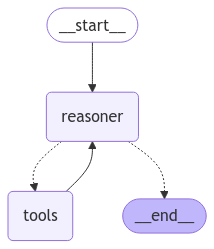

In [46]:
react_graph

In [56]:
messages=[HumanMessage(content="What would be GDP growth of Telangana if it doubles from current year GDP get current year using DuckDuckGo Tool?")]
messages=react_graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

What would be GDP growth of Telangana if it doubles from current year GDP get current year using DuckDuckGo Tool?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_njjh)
 Call ID: call_njjh
  Args:
    query: GDP of Telangana current year
================================= Tool Message =================================
Name: duckduckgo_search

Between 2014-15 and November 2023-24, Telangana's contribution to India's nominal GDP increased from 4.1% to 4.9%, reflecting the State's robust economic policies and effective governance. The Gross State Domestic Product (GSDP) at current prices surged from Rs.5,05,849 crore in 2014-15 to an impressive Rs.14,49,708 crore in 2023-24. Telangana's Agriculture and Allied sectors achieved a year-on-year growth in GVA at current prices of 4 per cent between 2022-23 and 2023-24. Since the sector employs 4

In [57]:
messages=[HumanMessage(content="What would be sum of ages of Elon Musk and Mount Everest?")]
messages=react_graph.invoke({"messages":messages})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

What would be sum of ages of Elon Musk and Mount Everest?
================================== Ai Message ==================================
Tool Calls:
  add (call_b22e)
 Call ID: call_b22e
  Args:
    a: 51
    b: 60000000
================================= Tool Message =================================
Name: add

60000051
================================== Ai Message ==================================

The sum of ages of Elon Musk and Mount Everest is 60000051.


In [58]:
import yfinance as yf
def get_stock_price(ticker: str)->float:
  """
  Gets a stock price from Yahoo Finance

  Args:
      ticker: ticker str
  """
  stock = yf.Ticker(ticker)
  return stock.info['previousClose']

In [59]:
get_stock_price("AAPL")

229.98

In [60]:
def reasoner(state):
  query=state["query"]
  messages=state["messages"]
  sys_msg=SystemMessage(content="You are a helpful assistant tasked with search and arithmetic capabilities and yahoo finance")
  message=HumanMessage(content=query)
  messages.append(message)
  result = [llm_with_tools.invoke([sys_msg]+messages)]
  return {"messages":result}

In [61]:
tools=[add, multiply, divide, search, get_stock_price]

In [62]:
llm_with_tools=llm.bind_tools(tools)

In [63]:
class GraphState(TypedDict):
  """State of graph"""
  query: str
  finance:str
  final_answer:str
  messages: Annotated[list[AnyMessage],operator.add]

In [65]:
workflow=StateGraph(GraphState)
workflow.add_node("reasoner",reasoner)
workflow.add_node("tools",ToolNode(tools))
workflow.add_edge(START,"reasoner")
workflow.add_conditional_edges(
    "reasoner",
    tools_condition
)
workflow.add_edge("tools","reasoner")
react_graph=workflow.compile()

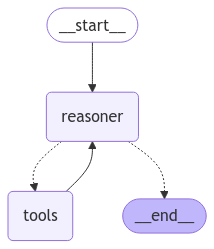

In [66]:
react_graph

In [75]:
response = react_graph.invoke({"query":"What is stock price of NVIDIA in Indian Rupee get current Exchange rate from DuckDuckGo and perform arithmetic operation?","messages":[]})

In [76]:
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

What is stock price of NVIDIA in Indian Rupee get current Exchange rate from DuckDuckGo and perform arithmetic operation?
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_q6h8)
 Call ID: call_q6h8
  Args:
    ticker: NVDA
================================= Tool Message =================================
Name: get_stock_price

137.71
================================ Human Message =================================

What is stock price of NVIDIA in Indian Rupee get current Exchange rate from DuckDuckGo and perform arithmetic operation?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_8s31)
 Call ID: call_8s31
  Args:
    query: INR to USD exchange rate
================================= Tool Message =================================
Name: duckduckgo_search

Exchange Rate Indi